<a href="https://colab.research.google.com/github/binit-13/Machine-Learning-Notes/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import random

from sklearn.datasets import make_regression, make_blobs
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML, Image
import seaborn as sns


## Three Types of Gradient Descent Algorithms from scratch
 1. Stochatic GD
 2. Batch GD
 3. Mini-Batch GD

loss function = derivation of $\sum_{k=1}^N (y-{ŷ})^2 $  
                2  $\sum_{i=1}^N (y-mXi-b)(-1)$

In [3]:
## toy dataset
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=12)

In [4]:
X.shape

(100, 1)

In [5]:
class SGD_Regressor:

  def __init__(self,learning_rate=0.01,epochs=100):

    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    # initiate your coefs
    self.intercept_ = 0
    self.coef_ = np.ones(X.shape[1])

    all_beta = []
    all_slope = []
    all_cost = []

    for i in range(self.epochs):
      for _ in range(X.shape[0]):
        idx = np.random.randint(0,X.shape[0]) ## Randomly selecting the data that makes it a SGD(Stochastic Gradient Descent)

        y_hat = np.dot(X[idx],self.coef_) + self.intercept_ ## y_hat is predicted => this term is mXi+b
        cost = (y[idx] - self.coef_ * X[idx] -self.intercept_) ** 2

        intercept_der = -2 * (y[idx] - y_hat) ## see above loss function/ new intercept being
        self.intercept_ = self.intercept_ - (self.lr * intercept_der)

        coef_der = -2 * np.dot((y[idx] - y_hat),X[idx])
        self.coef_ = self.coef_ - (self.lr * coef_der) ## Updating the

        all_beta.append(self.intercept_)
        all_slope.append(self.coef_)

    print(len(all_beta))
    print(self.intercept_,self.coef_)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [6]:
model = SGD_Regressor(epochs=10)
model.fit(X,y)


1000
-3.9866684132699666 [35.4524421]


In [7]:
all_beta = [] ## here slope and beta are updated randomly after every row has, hence len of all_beta/slope is epochs x X.shape
all_slope = []
all_cost = []

def fit(X,y,epochs=100,lr=0.01):

  intercept_ = 0
  coef_ = np.ones(X.shape[1])

  for _ in range(epochs):
    for _ in range(X.shape[0]):
      idx = np.random.randint(0,X.shape[0]) ## Randomly selecting the data that makes it a SGD(Stochastic Gradient Descent)

      y_hat = np.dot(X[idx],coef_) + intercept_ ## y_hat is predicted => this term is mXi+b
      cost = (y[idx] - coef_ * X[idx] - intercept_) ** 2

      intercept_der = -2 * (y[idx] - y_hat) ## see above loss function/ new intercept being
      intercept_ = intercept_ - (lr * intercept_der)

      coef_der = -2 * np.dot((y[idx] - y_hat),X[idx])
      coef_ = coef_ - (lr * coef_der) ## Updating the

      all_beta.append(intercept_)
      all_slope.append(coef_)
      all_cost.append(cost)

  print(len(all_beta))
  print(intercept_,coef_)

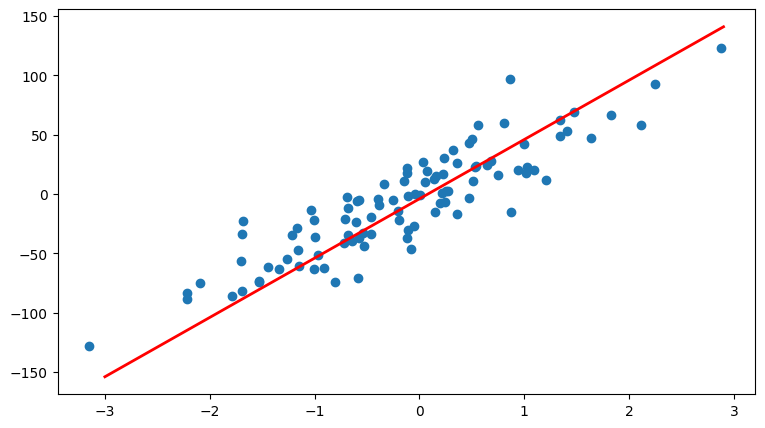

In [12]:
## Plotting regression line through epochs

fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_input = np.arange(-3, 3, 0.1)
y_input = x_input*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_input, x_input*50 - 4, 'r-', linewidth=2)

def update(frames):
  label = 'epoch {0}'.format(frames + 1)
  line.set_ydata(x_input*all_slope[frames] + all_beta[frames])
  ax.set_xlabel(label)

anim = FuncAnimation(fig, update, frames=100, interval=5)
plt.show()
file = r"stochastic_animation_line_plot.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(file, writer=writergif)


In [11]:
fit(X,y)

10000
0.022708101420099408 [37.90732868]


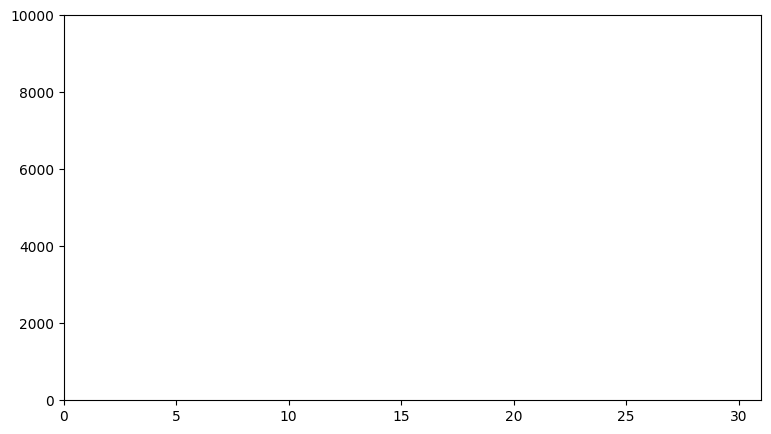

In [76]:
## Plotting cost_function through number of epochs

num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(0, 10000))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
  label = 'epoch {0}'.format(i + 1)
  xdata.append(num_epochs[i])
  ydata.append(all_cost[i])
  line.set_data(xdata, ydata)
  axis.set_xlabel(label)


# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 15)
plt.show()

file = r"stochastic_animation_cost_plot.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(file, writer=writergif)

In [42]:
import plotly.graph_objects as go
import plotly.express as px

m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)


fig = px.scatter_3d(x=np.array(all_slope).ravel(), y=np.array(all_beta).ravel(), z=np.array(all_cost).ravel()*100,labels={'x': 'slope', 'y':'beta','z':'cost'})
fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))
fig.show()

fig.write_html("cost_function2.html")

In [47]:
bgd_beta = []  # here weights and biases are updated only once when the whole data has been seen, hence len of bgd_slope and beta is 100
bgd_slope = []
def fit_bgd(X,y,epochs=100,lr=0.01):
  # init your coefs
  intercept_ = 0
  coef_ = np.ones(X.shape[1])

  for _ in range(epochs):
    # update all the coef and the intercept
    y_hat = np.dot(X,coef_) + intercept_
    #print("Shape of y_hat",y_hat.shape)
    intercept_der = -2 * np.mean(y - y_hat)
    intercept_ = intercept_ - (lr * intercept_der)

    coef_der = -2 * np.dot((y - y_hat),X)/X.shape[0]
    coef_ = coef_ - (lr * coef_der)

    bgd_beta.append(intercept_)
    bgd_slope.append(coef_)

    print(intercept_,coef_)

In [53]:
mbgd_beta = []
mbgd_slope = []

def minibgd_fit(X,y, epochs=100, lr=0.01, batch_size=50):
  ## initiating weights and bias
  intercept_ = 0
  coef_ = np.ones(X.shape[1])

  for i in range(epochs):

    for j in range(int(X.shape[0]/batch_size)):

      idx = random.sample(range(X.shape[0]),batch_size) ## batches at a time

      y_hat = np.dot(X[idx], coef_) + intercept_ ## predicted value
      #print("Shape of y_hat",y_hat.shape)
      intercept_der = -2 * np.mean(y[idx] - y_hat)
      intercept_ = intercept_ - (lr * intercept_der)

      coef_der = -2 * np.dot((y[idx] - y_hat),X[idx]) ## differentiating with respect to slope function
      coef_ = coef_ - (lr * coef_der)

      mbgd_beta.append(intercept_)
      mbgd_slope.append(coef_)

  print(len(mbgd_beta), len(mbgd_slope))
